In [1]:
data = {
    "ID": range(1, 11),
    "Age": [25, 30, 35, np.nan, 45, 50, 29, 41, np.nan, 38],
    "Salary": [50000, 60000, 75000, 40000, 90000, 100000, 55000, 80000, 62000, np.nan],
    "Education": ["Bachelor", "Master", "PhD", "Bachelor", "Master", "PhD", "Bachelor", "Master", "PhD", "Bachelor"],
    "Work Experience": [2, 5, 7, 1, 10, 12, 3, 8, 6, np.nan],
    "City": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"]
}

df = pd.DataFrame(data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,4,NaN,40000.0,Bachelor,1.0,Houston
4,5,45.0,90000.0,Master,10.0,Phoenix
5,6,50.0,100000.0,PhD,12.0,Philadelphia
6,7,29.0,55000.0,Bachelor,3.0,San Antonio
7,8,41.0,80000.0,Master,8.0,San Diego
8,9,NaN,62000.0,PhD,6.0,Dallas
9,10,38.0,NaN,Bachelor,NaN,San Jose


In [4]:
df.describe()

,ID,Age,Salary,Work Experience
count,10.00000,8.000000,9.000000,9.000000
mean,5.50000,36.625000,68000.000000,6.000000
std,3.02765,8.534593,19615.045246,3.674235
min,1.00000,25.000000,40000.000000,1.000000
25%,3.25000,29.750000,55000.000000,3.000000
50%,5.50000,36.500000,62000.000000,6.000000
75%,7.75000,42.000000,80000.000000,8.000000
max,10.00000,50.000000,100000.000000,12.000000



    "1. How many missing values are there in each column?",

In [36]:
count_na = df.isna().sum()
print("Here are the NA's count from the data on each coloumn:\n", count_na)

Here are the NA's count from the data on each coloumn:
 ID                 0
Age                2
Salary             1
Education          0
Work Experience    1
City               0
dtype: int64


In [ ]:
df.isna().any().sum()/df.isna().any().count()*10

50.0

    "2. How can we handle missing values in 'Age' and 'Salary' columns?",

In [42]:
df

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,4,NaN,40000.0,Bachelor,1.0,Houston
4,5,45.0,90000.0,Master,10.0,Phoenix
5,6,50.0,100000.0,PhD,12.0,Philadelphia
6,7,29.0,55000.0,Bachelor,3.0,San Antonio
7,8,41.0,80000.0,Master,8.0,San Diego
8,9,NaN,62000.0,PhD,6.0,Dallas
9,10,38.0,NaN,Bachelor,NaN,San Jose


In [ ]:
df_copy =

In [44]:
df_copy

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,4,NaN,40000.0,Bachelor,1.0,Houston
4,5,45.0,90000.0,Master,10.0,Phoenix
5,6,50.0,100000.0,PhD,12.0,Philadelphia
6,7,29.0,55000.0,Bachelor,3.0,San Antonio
7,8,41.0,80000.0,Master,8.0,San Diego
8,9,NaN,62000.0,PhD,6.0,Dallas
9,10,38.0,NaN,Bachelor,NaN,San Jose


In [73]:
df_copy_filtered = df_copy[df_copy['Age'].notna() & df_copy['Salary'].notna()].reset_index(drop=True)

In [74]:
df_copy_filtered

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,5,45.0,90000.0,Master,10.0,Phoenix
4,6,50.0,100000.0,PhD,12.0,Philadelphia
5,7,29.0,55000.0,Bachelor,3.0,San Antonio
6,8,41.0,80000.0,Master,8.0,San Diego


In [75]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [76]:
X_train = df_copy_filtered['Age'].values.reshape(-1,1)
Y_train = df_copy_filtered['Salary'].values

In [77]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [78]:
df_copy_missing_salary = df_copy[df_copy['Salary'].isnull()]

In [79]:
df_copy_missing_salary

,ID,Age,Salary,Education,Work Experience,City
9,10,38.0,NaN,Bachelor,NaN,San Jose


In [80]:
X_predict = df_copy_missing_salary['Age'].values.reshape(-1,1)

In [87]:
y_pred = model.predict(X_predict)
y_pred = y_pred.round(0)
y_pred

array([76019.])

In [ ]:
# we have predicted the salary using linear regression. 
df_copy.loc[df["Salary"].isna(), "Salary"] = y_pred
df_copy

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,4,NaN,40000.0,Bachelor,1.0,Houston
4,5,45.0,90000.0,Master,10.0,Phoenix
5,6,50.0,100000.0,PhD,12.0,Philadelphia
6,7,29.0,55000.0,Bachelor,3.0,San Antonio
7,8,41.0,80000.0,Master,8.0,San Diego
8,9,NaN,62000.0,PhD,6.0,Dallas
9,10,38.0,76019.0,Bachelor,NaN,San Jose


In [94]:
# also, lets find the average salary.
avg_salary = np.mean(df["Salary"])
print(avg_salary)
print(y_pred[0])
print(round(y_pred[0]-avg_salary))

68801.9
76019.0
7217


### Lets find the work_experince uaing the age values

In [98]:
#lets filter the dataframe 

df_copy_for_Expereince = df_copy[df_copy['Age'].notna() & df_copy['Work Experience'].notna()].reset_index(drop=True)
df_copy_for_Expereince

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,5,45.0,90000.0,Master,10.0,Phoenix
4,6,50.0,100000.0,PhD,12.0,Philadelphia
5,7,29.0,55000.0,Bachelor,3.0,San Antonio
6,8,41.0,80000.0,Master,8.0,San Diego


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Age vs Work Exp')

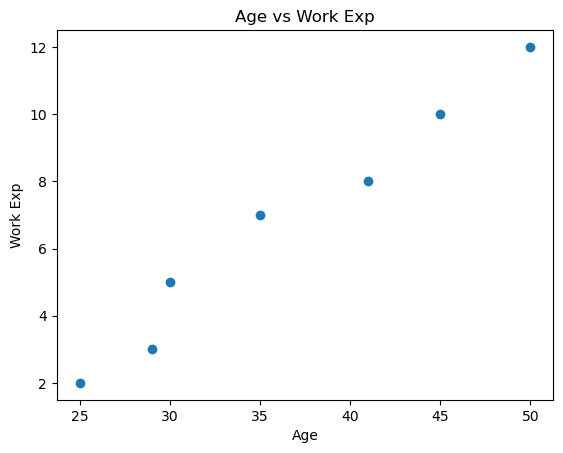

In [99]:
plt.scatter(df_copy_for_Expereince.Age,df_copy_for_Expereince['Work Experience'])
plt.xlabel('Age')
plt.ylabel('Work Exp')
plt.title('Age vs Work Exp')

In [100]:
xtrain_for_exp = df_copy_for_Expereince['Age'].values.reshape(-1,1)
ytrain_for_exp = df_copy_for_Expereince['Work Experience'].values

In [101]:
model_for_exp = LinearRegression()

In [111]:
model_for_exp.fit(xtrain_for_exp,ytrain_for_exp)

LinearRegression()

In [107]:
xpredict_for_exp = df_copy[df_copy['Work Experience'].isna()]
xpredict_age = xpredict_for_exp['Age'].values.reshape(-1,1)
xpredict_age

array([[38.]])

In [114]:
y_pred_exp = model_for_exp.predict(xpredict_age)
y_pred_exp = round(y_pred_exp[0])
y_pred_exp

7

In [115]:
df_copy.loc[df_copy['Work Experience'].isna(),'Work Experience']=y_pred_exp
df_copy

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,4,NaN,40000.0,Bachelor,1.0,Houston
4,5,45.0,90000.0,Master,10.0,Phoenix
5,6,50.0,100000.0,PhD,12.0,Philadelphia
6,7,29.0,55000.0,Bachelor,3.0,San Antonio
7,8,41.0,80000.0,Master,8.0,San Diego
8,9,NaN,62000.0,PhD,6.0,Dallas
9,10,38.0,76019.0,Bachelor,7.0,San Jose


### Lets find the Age using Salary and Experiance. (Multiple linear regression)

<IPython.core.display.Javascript object>

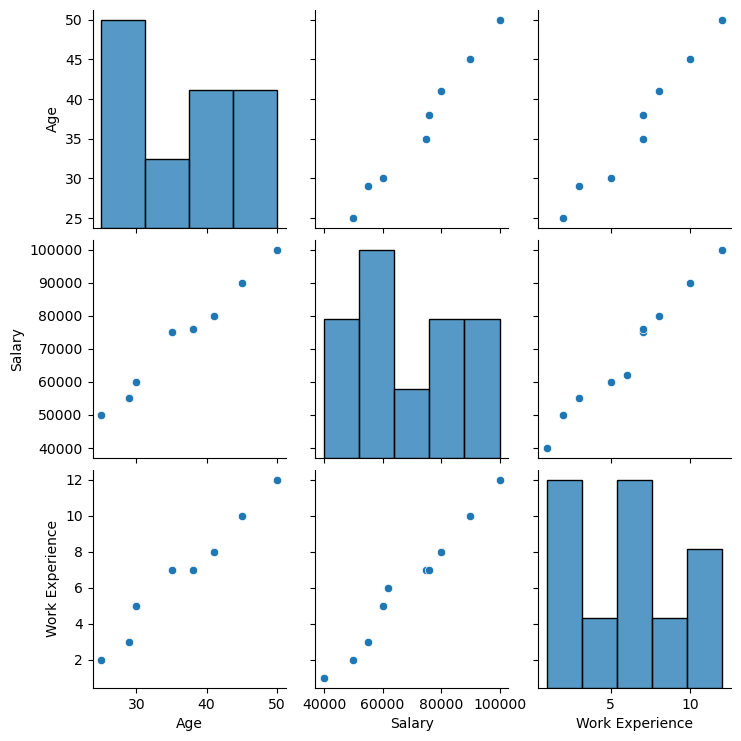

In [116]:
#lets see the correlation between age, aslary and work exp

sns.pairplot(df_copy[['Age','Salary','Work Experience']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

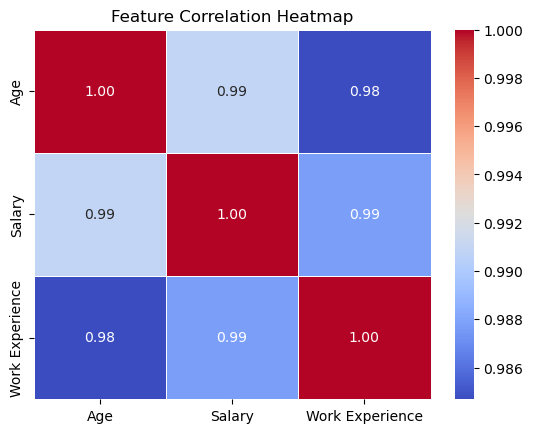

In [117]:
# Compute correlation matrix
corr_matrix = df_copy[['Age','Salary','Work Experience']].corr()  # Exclude non-numeric column

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [118]:
#just using Slaary will be a good choice to do the linear regression. 
df_copy

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,4,NaN,40000.0,Bachelor,1.0,Houston
4,5,45.0,90000.0,Master,10.0,Phoenix
5,6,50.0,100000.0,PhD,12.0,Philadelphia
6,7,29.0,55000.0,Bachelor,3.0,San Antonio
7,8,41.0,80000.0,Master,8.0,San Diego
8,9,NaN,62000.0,PhD,6.0,Dallas
9,10,38.0,76019.0,Bachelor,7.0,San Jose


In [120]:
df_to_predict_age = df_copy[df_copy['Age'].notna()].reset_index(drop = True)
df_to_predict_age

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,5,45.0,90000.0,Master,10.0,Phoenix
4,6,50.0,100000.0,PhD,12.0,Philadelphia
5,7,29.0,55000.0,Bachelor,3.0,San Antonio
6,8,41.0,80000.0,Master,8.0,San Diego
7,10,38.0,76019.0,Bachelor,7.0,San Jose


In [123]:
x_training_for_age = df_to_predict_age['Salary'].values.reshape(-1,1)
y_training_for_age = df_to_predict_age['Age'].values


In [124]:
model_3 = LinearRegression()
model_3.fit(x_training_for_age,y_training_for_age)

LinearRegression()

In [131]:
df_to_predict = df_copy[df_copy['Age'].isnull()]
x_to_predict = df_to_predict['Salary'].values.reshape(-1,1)
x_to_predict

array([[40000.],
       [62000.]])

In [135]:
y_predicted = model_3.predict(x_to_predict)
y_predicted = np.round(y_predicted)
y_predicted

array([20., 31.])

In [136]:
df_copy.loc[df_copy['Age'].isna(),'Age']=y_predicted
df_copy

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,4,20.0,40000.0,Bachelor,1.0,Houston
4,5,45.0,90000.0,Master,10.0,Phoenix
5,6,50.0,100000.0,PhD,12.0,Philadelphia
6,7,29.0,55000.0,Bachelor,3.0,San Antonio
7,8,41.0,80000.0,Master,8.0,San Diego
8,9,31.0,62000.0,PhD,6.0,Dallas
9,10,38.0,76019.0,Bachelor,7.0,San Jose


   "3. Convert the 'Education' column into numerical values using one-hot encoding.",

In [137]:
from sklearn.preprocessing import OneHotEncoder

In [153]:
encoder = OneHotEncoder()

In [154]:
df_copy

,ID,Age,Salary,Education,Work Experience,City
0,1,25.0,50000.0,Bachelor,2.0,New York
1,2,30.0,60000.0,Master,5.0,Los Angeles
2,3,35.0,75000.0,PhD,7.0,Chicago
3,4,20.0,40000.0,Bachelor,1.0,Houston
4,5,45.0,90000.0,Master,10.0,Phoenix
5,6,50.0,100000.0,PhD,12.0,Philadelphia
6,7,29.0,55000.0,Bachelor,3.0,San Antonio
7,8,41.0,80000.0,Master,8.0,San Diego
8,9,31.0,62000.0,PhD,6.0,Dallas
9,10,38.0,76019.0,Bachelor,7.0,San Jose


In [156]:
encoded = encoder.fit_transform(df[['Education']]).toarray()

In [157]:
encoded

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [144]:
import pandas as pd

In [158]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [159]:
encoded_df

,Education_Bachelor,Education_Master,Education_PhD
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [162]:
df_copy_encoded = pd.concat([df_copy,encoded_df],axis=1)
df_copy_encoded

,ID,Age,Salary,Education,Work Experience,City,Education_Bachelor,Education_Master,Education_PhD
0,1,25.0,50000.0,Bachelor,2.0,New York,1.0,0.0,0.0
1,2,30.0,60000.0,Master,5.0,Los Angeles,0.0,1.0,0.0
2,3,35.0,75000.0,PhD,7.0,Chicago,0.0,0.0,1.0
3,4,20.0,40000.0,Bachelor,1.0,Houston,1.0,0.0,0.0
4,5,45.0,90000.0,Master,10.0,Phoenix,0.0,1.0,0.0
5,6,50.0,100000.0,PhD,12.0,Philadelphia,0.0,0.0,1.0
6,7,29.0,55000.0,Bachelor,3.0,San Antonio,1.0,0.0,0.0
7,8,41.0,80000.0,Master,8.0,San Diego,0.0,1.0,0.0
8,9,31.0,62000.0,PhD,6.0,Dallas,0.0,0.0,1.0
9,10,38.0,76019.0,Bachelor,7.0,San Jose,1.0,0.0,0.0


In [163]:
df_copy_encoded = df_copy_encoded.drop('Education', axis = 1)
df_copy_encoded

,ID,Age,Salary,Work Experience,City,Education_Bachelor,Education_Master,Education_PhD
0,1,25.0,50000.0,2.0,New York,1.0,0.0,0.0
1,2,30.0,60000.0,5.0,Los Angeles,0.0,1.0,0.0
2,3,35.0,75000.0,7.0,Chicago,0.0,0.0,1.0
3,4,20.0,40000.0,1.0,Houston,1.0,0.0,0.0
4,5,45.0,90000.0,10.0,Phoenix,0.0,1.0,0.0
5,6,50.0,100000.0,12.0,Philadelphia,0.0,0.0,1.0
6,7,29.0,55000.0,3.0,San Antonio,1.0,0.0,0.0
7,8,41.0,80000.0,8.0,San Diego,0.0,1.0,0.0
8,9,31.0,62000.0,6.0,Dallas,0.0,0.0,1.0
9,10,38.0,76019.0,7.0,San Jose,1.0,0.0,0.0


    "4. Normalize the 'Salary' column using Min-Max Scaling.",

In [164]:
from sklearn.preprocessing import minmax_scale

In [165]:
df_copy_encoded['Salary_scaled'] = minmax_scale(df_copy_encoded['Salary'])
df_copy_encoded

,ID,Age,Salary,Work Experience,City,Education_Bachelor,Education_Master,Education_PhD,Salary_scaled
0,1,25.0,50000.0,2.0,New York,1.0,0.0,0.0,0.166667
1,2,30.0,60000.0,5.0,Los Angeles,0.0,1.0,0.0,0.333333
2,3,35.0,75000.0,7.0,Chicago,0.0,0.0,1.0,0.583333
3,4,20.0,40000.0,1.0,Houston,1.0,0.0,0.0,0.000000
4,5,45.0,90000.0,10.0,Phoenix,0.0,1.0,0.0,0.833333
5,6,50.0,100000.0,12.0,Philadelphia,0.0,0.0,1.0,1.000000
6,7,29.0,55000.0,3.0,San Antonio,1.0,0.0,0.0,0.250000
7,8,41.0,80000.0,8.0,San Diego,0.0,1.0,0.0,0.666667
8,9,31.0,62000.0,6.0,Dallas,0.0,0.0,1.0,0.366667
9,10,38.0,76019.0,7.0,San Jose,1.0,0.0,0.0,0.600317


 "5. Create a new feature 'Experience Level' based on 'Work Experience' (e.g., Junior, Mid, Senior).",

In [170]:
df_copy_encoded.columns = df_copy_encoded.columns.str.replace(' ','_')

In [172]:
def exp_level(Work_Experience):
    if 0< Work_Experience <4:
        return 'Junior'
    elif 4<= Work_Experience < 9:
        return 'Mid'
    else:
        return 'Senior'

In [173]:
df_copy_encoded['Experience_Level'] = df_copy_encoded['Work_Experience'].apply(exp_level)

In [174]:
df_copy_encoded

,ID,Age,Salary,Work_Experience,City,Education_Bachelor,Education_Master,Education_PhD,Salary_scaled,Experience_Level
0,1,25.0,50000.0,2.0,New York,1.0,0.0,0.0,0.166667,Junior
1,2,30.0,60000.0,5.0,Los Angeles,0.0,1.0,0.0,0.333333,Mid
2,3,35.0,75000.0,7.0,Chicago,0.0,0.0,1.0,0.583333,Mid
3,4,20.0,40000.0,1.0,Houston,1.0,0.0,0.0,0.000000,Junior
4,5,45.0,90000.0,10.0,Phoenix,0.0,1.0,0.0,0.833333,Senior
5,6,50.0,100000.0,12.0,Philadelphia,0.0,0.0,1.0,1.000000,Senior
6,7,29.0,55000.0,3.0,San Antonio,1.0,0.0,0.0,0.250000,Junior
7,8,41.0,80000.0,8.0,San Diego,0.0,1.0,0.0,0.666667,Mid
8,9,31.0,62000.0,6.0,Dallas,0.0,0.0,1.0,0.366667,Mid
9,10,38.0,76019.0,7.0,San Jose,1.0,0.0,0.0,0.600317,Mid


    "6. Encode the 'City' column using label encoding.",

In [ ]:
df_copy_encoded['City'].nunique()

10

In [185]:
from sklearn.preprocessing import LabelEncoder

In [186]:
df_copy_encoded['City_encoded'] = LabelEncoder().fit_transform(df_copy_encoded['City'])

In [187]:
df_copy_encoded

,ID,Age,Salary,Work_Experience,City,Education_Bachelor,Education_Master,Education_PhD,Salary_scaled,Experience_Level,City_encoded
0,1,25.0,50000.0,2.0,New York,1.0,0.0,0.0,0.166667,Junior,4
1,2,30.0,60000.0,5.0,Los Angeles,0.0,1.0,0.0,0.333333,Mid,3
2,3,35.0,75000.0,7.0,Chicago,0.0,0.0,1.0,0.583333,Mid,0
3,4,20.0,40000.0,1.0,Houston,1.0,0.0,0.0,0.000000,Junior,2
4,5,45.0,90000.0,10.0,Phoenix,0.0,1.0,0.0,0.833333,Senior,6
5,6,50.0,100000.0,12.0,Philadelphia,0.0,0.0,1.0,1.000000,Senior,5
6,7,29.0,55000.0,3.0,San Antonio,1.0,0.0,0.0,0.250000,Junior,7
7,8,41.0,80000.0,8.0,San Diego,0.0,1.0,0.0,0.666667,Mid,8
8,9,31.0,62000.0,6.0,Dallas,0.0,0.0,1.0,0.366667,Mid,1
9,10,38.0,76019.0,7.0,San Jose,1.0,0.0,0.0,0.600317,Mid,9


    "7. Generate an interaction feature between 'Age' and 'Work Experience'.",

In [189]:
df_copy_encoded['Age_work_exp'] = df_copy_encoded['Age'] * df_copy_encoded['Work_Experience']
df_copy_encoded

,ID,Age,Salary,Work_Experience,City,Education_Bachelor,Education_Master,Education_PhD,Salary_scaled,Experience_Level,City_encoded,Age_work_exp
0,1,25.0,50000.0,2.0,New York,1.0,0.0,0.0,0.166667,Junior,4,50.0
1,2,30.0,60000.0,5.0,Los Angeles,0.0,1.0,0.0,0.333333,Mid,3,150.0
2,3,35.0,75000.0,7.0,Chicago,0.0,0.0,1.0,0.583333,Mid,0,245.0
3,4,20.0,40000.0,1.0,Houston,1.0,0.0,0.0,0.000000,Junior,2,20.0
4,5,45.0,90000.0,10.0,Phoenix,0.0,1.0,0.0,0.833333,Senior,6,450.0
5,6,50.0,100000.0,12.0,Philadelphia,0.0,0.0,1.0,1.000000,Senior,5,600.0
6,7,29.0,55000.0,3.0,San Antonio,1.0,0.0,0.0,0.250000,Junior,7,87.0
7,8,41.0,80000.0,8.0,San Diego,0.0,1.0,0.0,0.666667,Mid,8,328.0
8,9,31.0,62000.0,6.0,Dallas,0.0,0.0,1.0,0.366667,Mid,1,186.0
9,10,38.0,76019.0,7.0,San Jose,1.0,0.0,0.0,0.600317,Mid,9,266.0


    "8. Apply log transformation on the 'Salary' column to reduce skewness.",

(array([1., 1., 1., 2., 0., 1., 2., 0., 1., 1.]),
 array([ 40000.,  46000.,  52000.,  58000.,  64000.,  70000.,  76000.,
         82000.,  88000.,  94000., 100000.]),
 <BarContainer object of 10 artists>)

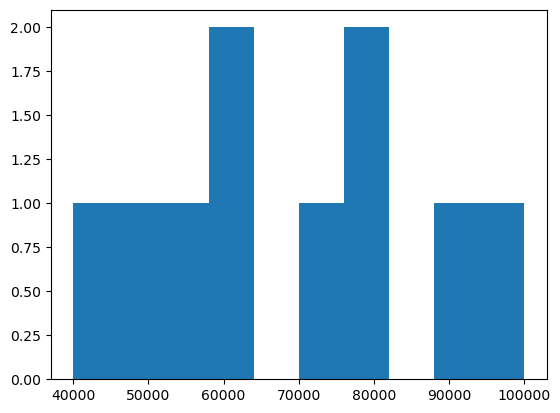

In [192]:
import matplotlib.pyplot as plt

plt.hist(df_copy_encoded['Salary'])


In [193]:
df_copy_encoded['Salary_log_transformed'] = np.log(df_copy_encoded['Salary'])
df_copy_encoded

,ID,Age,Salary,Work_Experience,City,Education_Bachelor,Education_Master,Education_PhD,Salary_scaled,Experience_Level,City_encoded,Age_work_exp,Salary_log_transformed
0,1,25.0,50000.0,2.0,New York,1.0,0.0,0.0,0.166667,Junior,4,50.0,10.819778
1,2,30.0,60000.0,5.0,Los Angeles,0.0,1.0,0.0,0.333333,Mid,3,150.0,11.002100
2,3,35.0,75000.0,7.0,Chicago,0.0,0.0,1.0,0.583333,Mid,0,245.0,11.225243
3,4,20.0,40000.0,1.0,Houston,1.0,0.0,0.0,0.000000,Junior,2,20.0,10.596635
4,5,45.0,90000.0,10.0,Phoenix,0.0,1.0,0.0,0.833333,Senior,6,450.0,11.407565
5,6,50.0,100000.0,12.0,Philadelphia,0.0,0.0,1.0,1.000000,Senior,5,600.0,11.512925
6,7,29.0,55000.0,3.0,San Antonio,1.0,0.0,0.0,0.250000,Junior,7,87.0,10.915088
7,8,41.0,80000.0,8.0,San Diego,0.0,1.0,0.0,0.666667,Mid,8,328.0,11.289782
8,9,31.0,62000.0,6.0,Dallas,0.0,0.0,1.0,0.366667,Mid,1,186.0,11.034890
9,10,38.0,76019.0,7.0,San Jose,1.0,0.0,0.0,0.600317,Mid,9,266.0,11.238739


(array([1., 0., 1., 1., 2., 0., 1., 2., 1., 1.]),
 array([10.59663473, 10.68826381, 10.77989288, 10.87152195, 10.96315103,
        11.0547801 , 11.14640917, 11.23803825, 11.32966732, 11.42129639,
        11.51292546]),
 <BarContainer object of 10 artists>)

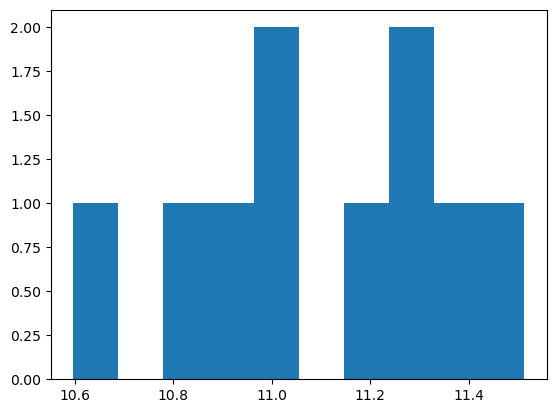

In [194]:
plt.hist(df_copy_encoded['Salary_log_transformed'])


    "9. Extract the first letter of each city name and create a new feature 'City Initial'.",
  

In [195]:
def extract_city_initials(city_name):
    return city_name[0]

In [196]:
df_copy_encoded['City_initials'] = df_copy_encoded['City'].apply(extract_city_initials)

In [197]:
df_copy_encoded

,ID,Age,Salary,Work_Experience,City,Education_Bachelor,Education_Master,Education_PhD,Salary_scaled,Experience_Level,City_encoded,Age_work_exp,Salary_log_transformed,City_initials
0,1,25.0,50000.0,2.0,New York,1.0,0.0,0.0,0.166667,Junior,4,50.0,10.819778,N
1,2,30.0,60000.0,5.0,Los Angeles,0.0,1.0,0.0,0.333333,Mid,3,150.0,11.002100,L
2,3,35.0,75000.0,7.0,Chicago,0.0,0.0,1.0,0.583333,Mid,0,245.0,11.225243,C
3,4,20.0,40000.0,1.0,Houston,1.0,0.0,0.0,0.000000,Junior,2,20.0,10.596635,H
4,5,45.0,90000.0,10.0,Phoenix,0.0,1.0,0.0,0.833333,Senior,6,450.0,11.407565,P
5,6,50.0,100000.0,12.0,Philadelphia,0.0,0.0,1.0,1.000000,Senior,5,600.0,11.512925,P
6,7,29.0,55000.0,3.0,San Antonio,1.0,0.0,0.0,0.250000,Junior,7,87.0,10.915088,S
7,8,41.0,80000.0,8.0,San Diego,0.0,1.0,0.0,0.666667,Mid,8,328.0,11.289782,S
8,9,31.0,62000.0,6.0,Dallas,0.0,0.0,1.0,0.366667,Mid,1,186.0,11.034890,D
9,10,38.0,76019.0,7.0,San Jose,1.0,0.0,0.0,0.600317,Mid,9,266.0,11.238739,S


  "10. What insights can be drawn from the transformed dataset?"